In [4]:
import os

def dirs(path):  
    for file in os.listdir(path):
        if os.path.isdir(os.path.join(path, file)):
            if not file.startswith('.'):
                if not file.endswith('.output'):
                    yield file

def files(path):  
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            if not file.startswith('.'):
                if file.endswith('.out'):
                    yield file

task1_metrics = ["num_rels","rels_found","last_rel","norm_last_rel","ap","recall@50","recall@100","recall@200",
                 "recall@300","recall@400","recall@500","recall@1000","recall@2000","recall@5000",
                 "recall_at_threshold","recall_threshold"]

task2_metrics = ["num_rels","last_rel","norm_last_rel","ap","recall@10%","recall@20%","recall@30%","recall@40%",
                 "recall@50%","recall@60%","recall@70%","recall@80%","recall@90%","recall@100%","wss_95","wss_100",
                 "threshold","norm_threshold","recall_threshold"]

for dir in dirs("."):  
    for file in files("./Results/" + dir):
        with open("./Results/" + dir + '/' + file, 'r') as f:
            try:
                os.stat("./Results/" + dir + '.output')
            except:
                os.mkdir("./Results/" + dir + '.output')
            with open("./" + dir + '.output' + '/' + file, 'w') as w:
                for line in f:
                    topic, metric, value = line.split()
                    if metric in task2_metrics:
                        w.write(topic + '\t' + metric + '\t' + value + '\n')


In [83]:
from collections import defaultdict

def dirs(path):  
    for file in os.listdir(path):
        if os.path.isdir(os.path.join(path, file)):
            if not file.startswith('.'):
                if not file.endswith('.output'):
                    yield file

def files(path):  
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            if not file.startswith('.'):
                if file.endswith('.out'):
                    yield file

AP = []
runs = []
for dir in dirs("./Results/"):
    for file in files("./Results/" + dir + '/Qualitative/abs/'):
        tmp_f = file.split('.')
        ap_run = []
        if tmp_f[0].startswith('2018'): continue
        with open("./Results/" + dir + '/Qualitative/abs/' + file, 'r') as f:
            for line in f:
                tmp = line.split()
                if tmp[1] == 'ap':
                    ap_run.append(float(tmp[2]))
        AP.append(ap_run)
        runs.append(tmp_f[0])

In [84]:
runs, AP = (list(t) for t in zip(*sorted(zip(runs, AP))))
runs

['Qualitative_sheffield-baseline',
 'Qualitative_sheffield-relevance_feedback',
 'abs-hh-ratio-ilps@uva',
 'abs-th-ratio-ilps@uva',
 'baseline_bm25_t100',
 'baseline_bm25_t1000',
 'baseline_bm25_t1500',
 'baseline_bm25_t200',
 'baseline_bm25_t300',
 'baseline_bm25_t400',
 'baseline_bm25_t500',
 'distributed_effort_p10_t100',
 'distributed_effort_p10_t1000',
 'distributed_effort_p10_t1500',
 'distributed_effort_p10_t200',
 'distributed_effort_p10_t300',
 'distributed_effort_p10_t400',
 'distributed_effort_p10_t500']

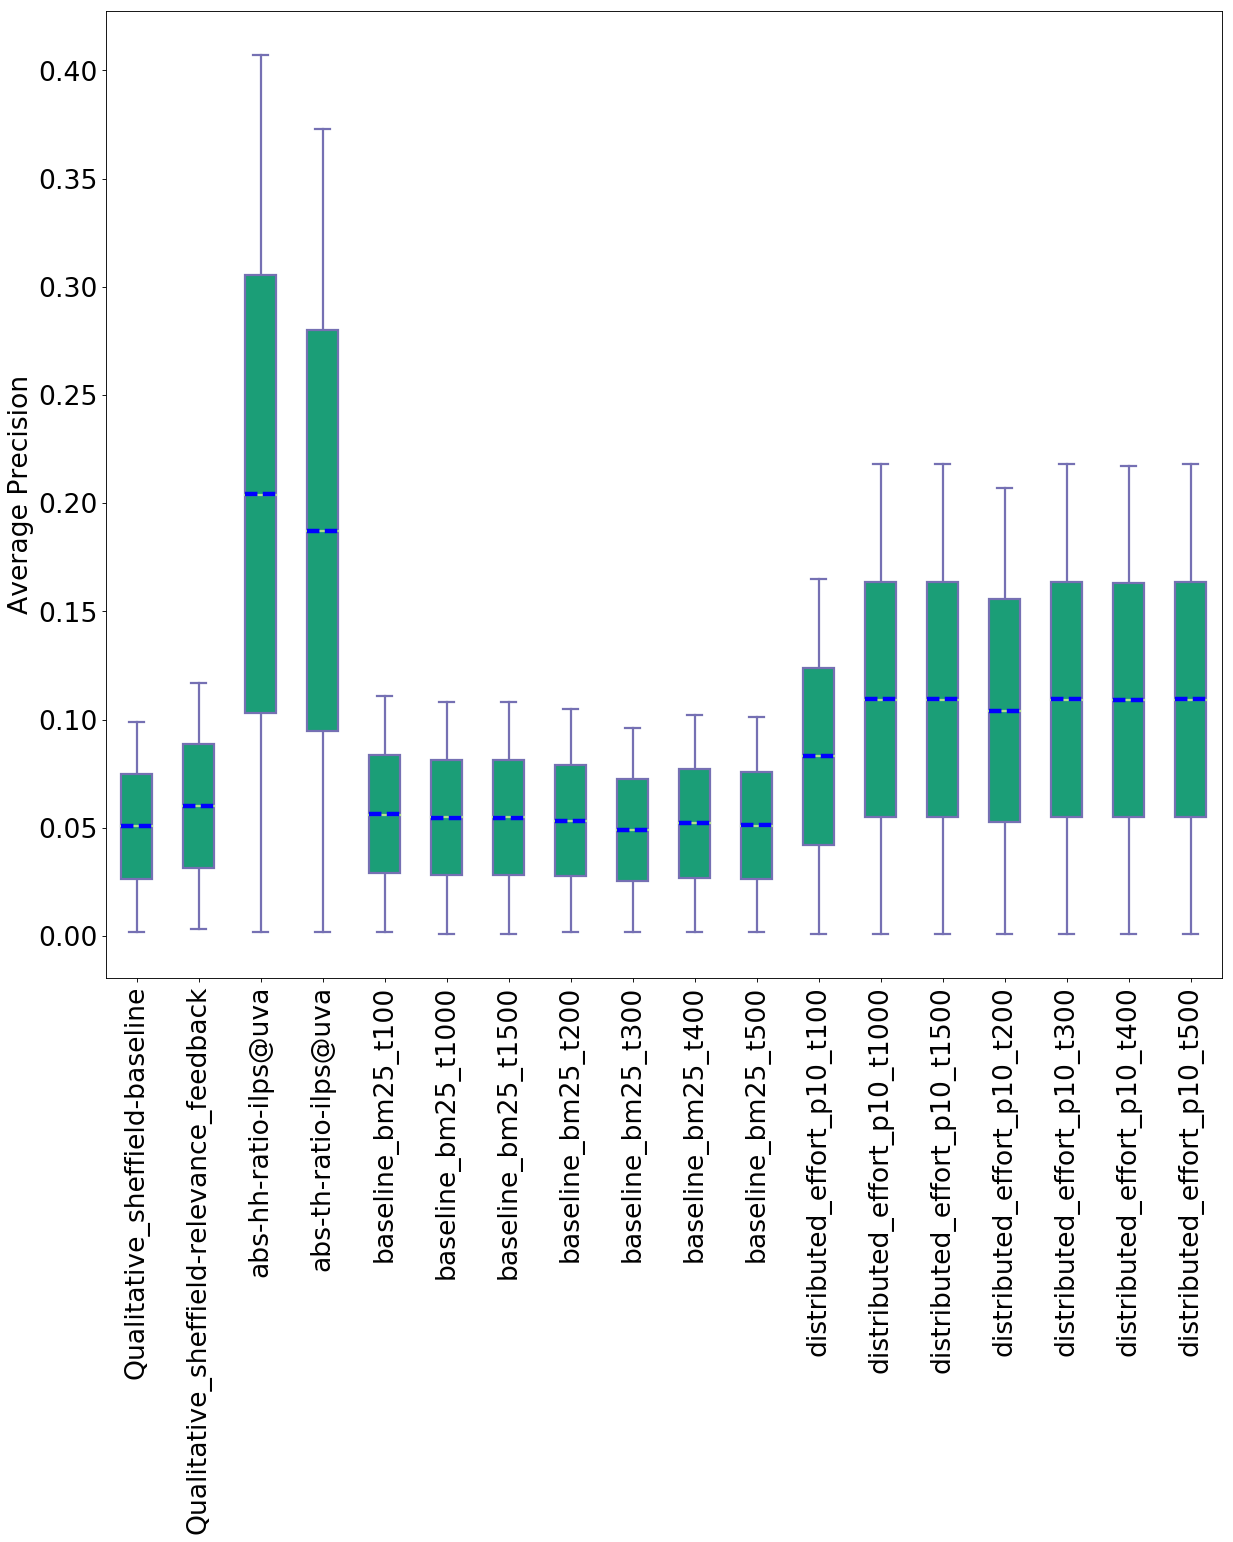

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
bp = ax.boxplot(AP, patch_artist=True, showmeans=True, meanline=True, bootstrap=1000)

ax.set_axisbelow(True)
ax.set_ylabel('Average Precision', fontsize=24)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
for mean in bp['means']:
    mean.set(color='blue', linewidth=4)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
     
xtickNames = plt.setp(ax, xticklabels=runs)
plt.setp(xtickNames, rotation=90, fontsize=24)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

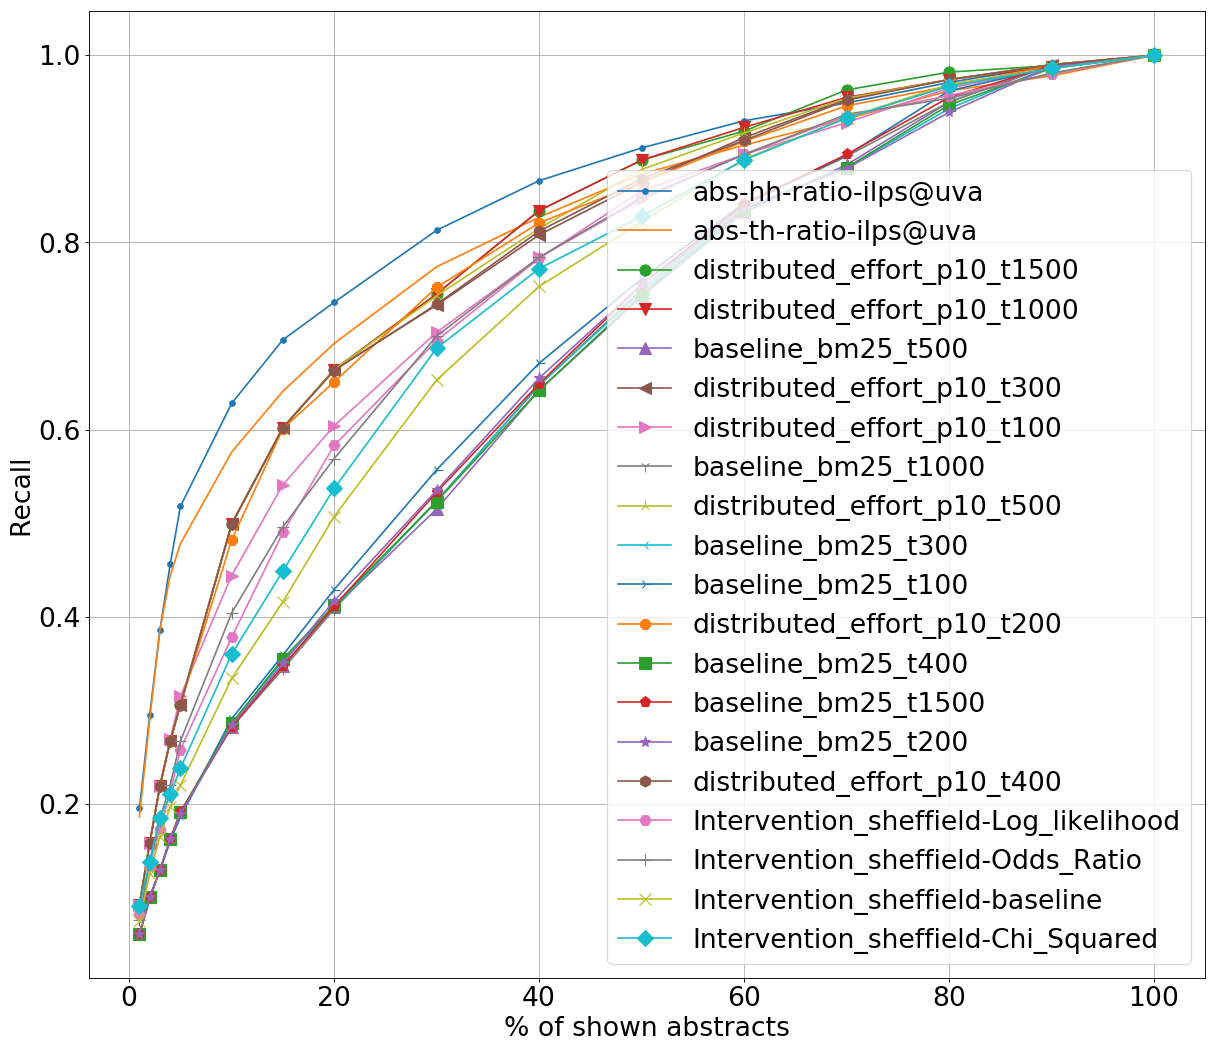

In [112]:
recall = []
k = [1,2,3,4,5,10,15,20,30,40,50,60,70,80,90,100]
runs = []
with open("Results/task2.out.all", 'r') as f:
    for line in f:
        tmp = line.split()
        if tmp[0] != 'Run':
            run_name = tmp[0].split('.')[1].split('/')[3]
            if run_name.startswith('2018'): continue
            recall.append(tmp[3:19])
            runs.append(run_name)

        
import itertools
import matplotlib as mpl


fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

# create valid markers from mpl.markers
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if 
item[1] is not 'nothing' and not item[1].startswith('tick') 
and not item[1].startswith('caret')])

# use fillable markers
# valid_markers = mpl.markers.MarkerStyle.filled_markers

markers = marker = itertools.cycle(valid_markers)

i = 0
for run in runs:
    plt.plot(k, recall[i], label=runs[i], marker=next(marker), markersize=10)
    i = i + 1

#doc_rel = [318,593,89,31,171,257,38,46,413,8,53,60,342,29,14,160,80,43,349,13,91,19,154,75,53,721,46,36,339,15]

#recall_oracle = []
#for t in k:
#    s = 0
#    for nd in doc_rel:
#        s = s +min(1, t/nd)
#    recall_oracle.append(s/30)
#plt.plot(k, recall_oracle, label='Oracle', marker=next(marker), markersize=10)

plt.legend(prop={'size': 24})

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
ax.set_axisbelow(True)
ax.set_xlabel('% of shown abstracts', fontsize = 24)
ax.set_ylabel('Recall', fontsize = 24)
plt.grid(True)

In [104]:
'''
Method to take two equally-sized lists and return just the elements which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the parameters.
'''
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

In [117]:
recall = []
k = []
runs = []
with open("Results/task2.out.all", 'r') as f:
    for line in f:
        tmp = line.split()
        if tmp[0] != 'Run':
            run_name = tmp[0].split('.')[1].split('/')[3]
            if run_name.startswith('2018'): continue
            recall.append(tmp[22])
            k.append(int(round(float(tmp[23]))))
            runs.append(run_name)

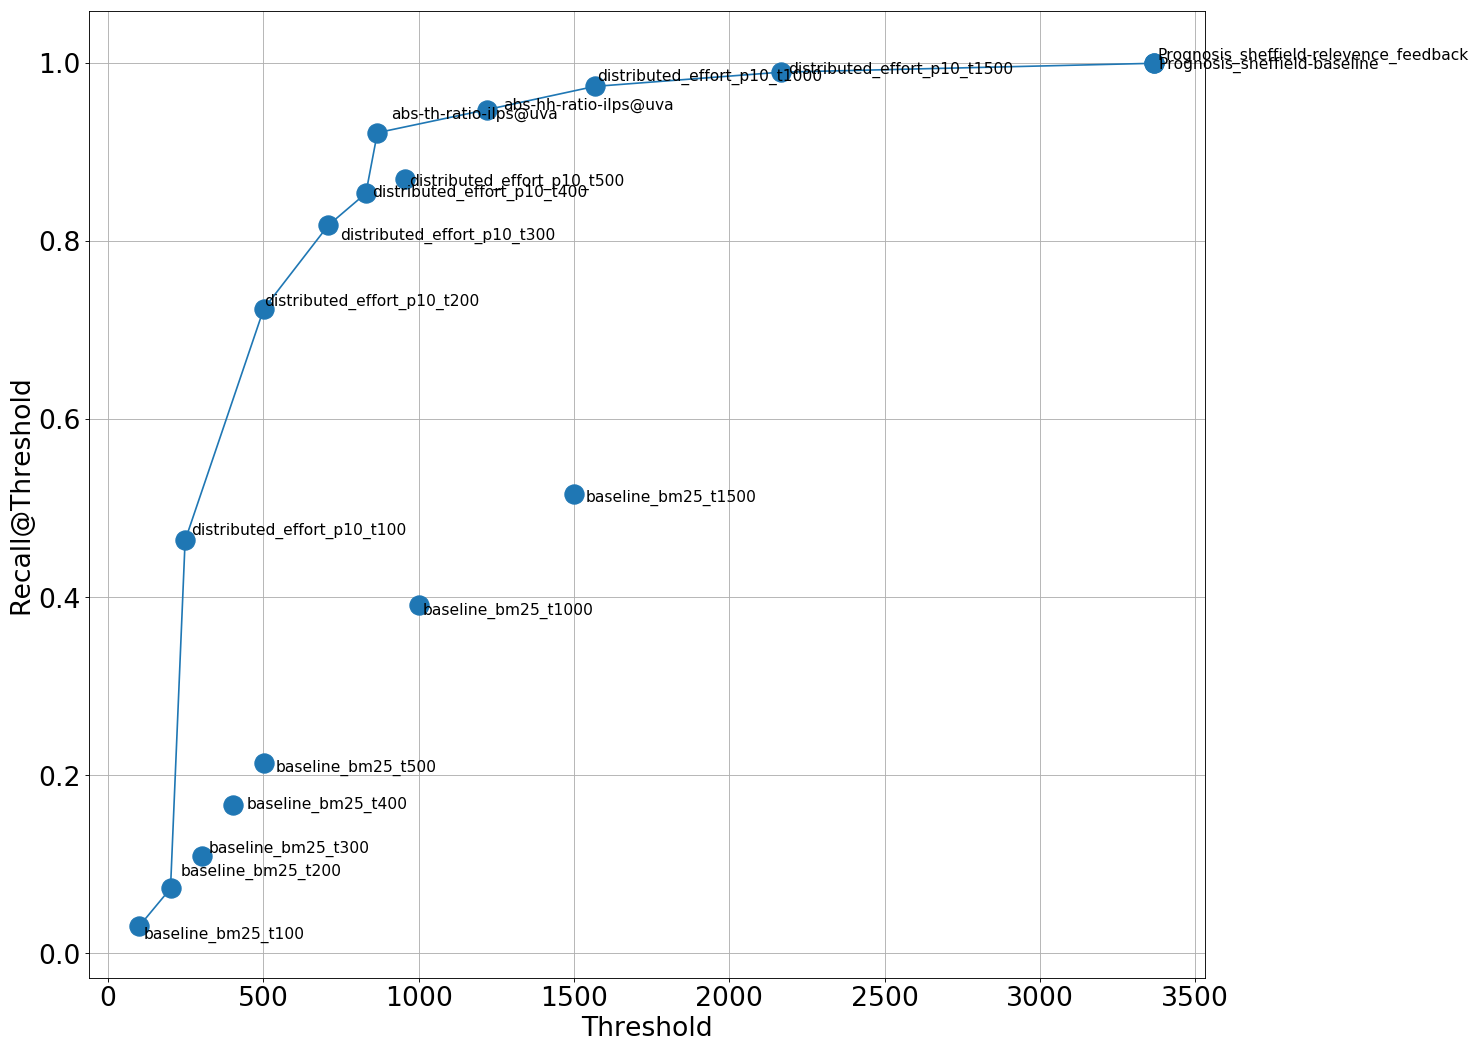

In [118]:
import random

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

plt.scatter(k, recall, marker = "o", s=300)
for i, r in enumerate(runs):
    ax.annotate( str(r), xy = ( k[i] + random.randint(1,50), float(recall[i]) + random.randint(-8,8)/500 ) , fontsize=14)

p_front = pareto_frontier(k, recall, maxX = False, maxY = True) 
plt.plot(p_front[0], p_front[1])

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
    
#ax.set_xlim(-10000, 120000)
ax.set_axisbelow(True)
ax.set_xlabel('Threshold', fontsize=24)
ax.set_ylabel('Recall@Threshold', fontsize=24)
plt.grid(True)

In [101]:
from collections import defaultdict

def dirs(path):  
    for file in os.listdir(path):
        if os.path.isdir(os.path.join(path, file)):
            if not file.startswith('.'):
                if not file.endswith('.output'):
                    yield file

def files(path):  
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            if not file.startswith('.'):
                if file.endswith('Results/task2.all.out'):
                    yield file

AP = defaultdict(list)
for dir in dirs("."):  
    for file in files("./" + dir):
        with open("./" + dir + '/' + file, 'r') as f:
            for line in f:
                tmp = line.split()
                if tmp[1] == 'ap' and tmp[0] != "ALL":
                    AP[tmp[0]].append(float(tmp[2]))

import numpy as np

topic_ap = []
topic_id = []
avg_ap = []
for topic in AP:
    topic_ap.append(AP[topic])
    avg_ap.append(np.mean(AP[topic]))
    topic_id.append(topic)

In [56]:
s_index = sorted(range(len(avg_ap)), key=lambda k: avg_ap[k])
topic_ap_s = []
topic_id_s = []
for ind in s_index:
    topic_ap_s.append(topic_ap[ind])
    topic_id_s.append(topic_id[ind])

IndexError: list index out of range

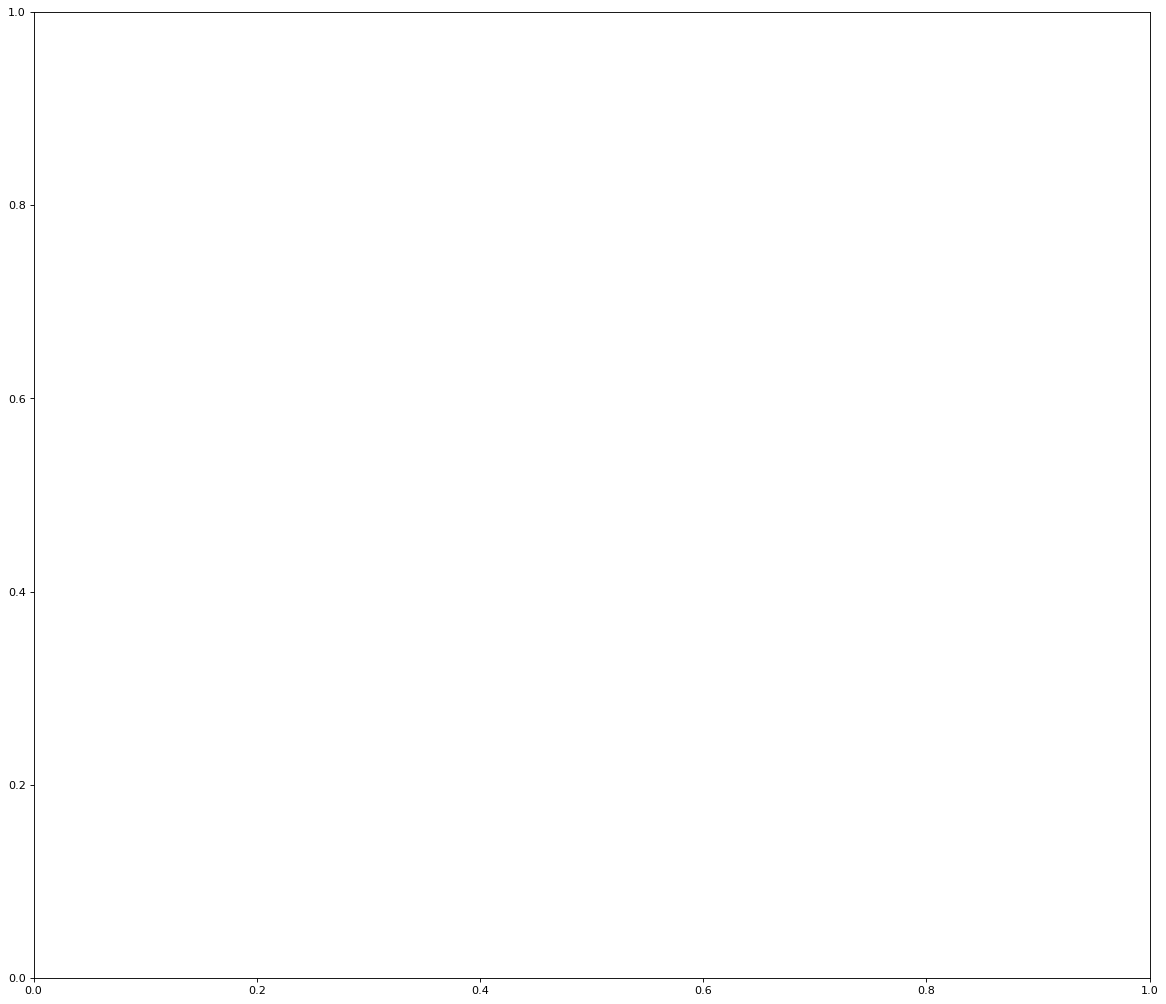

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
bp = ax.boxplot(topic_ap_s, patch_artist=True, showmeans=True, meanline=True, bootstrap=1000)

ax.set_axisbelow(True)
ax.set_ylabel('Average Precision', fontsize=24)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
for mean in bp['means']:
    mean.set(color='blue', linewidth=4)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
     
xtickNames = plt.setp(ax, xticklabels=topic_id_s)
plt.setp(xtickNames, rotation=90, fontsize=24)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)